In [1]:
import pandas as pd
import numpy as np
file_path = 'reliance.csv'
df = pd.read_csv(file_path)
df=df.iloc[0:-7]
columnsdel=[0,1,9,10,11,12,13]
df=df.drop(df.columns[columnsdel],axis=1)
df.head()
data_matrix=df.to_numpy()
data_matrix[ :,[3,4]]=data_matrix[ :,[4,3]]
print(data_matrix.shape)

(55, 7)


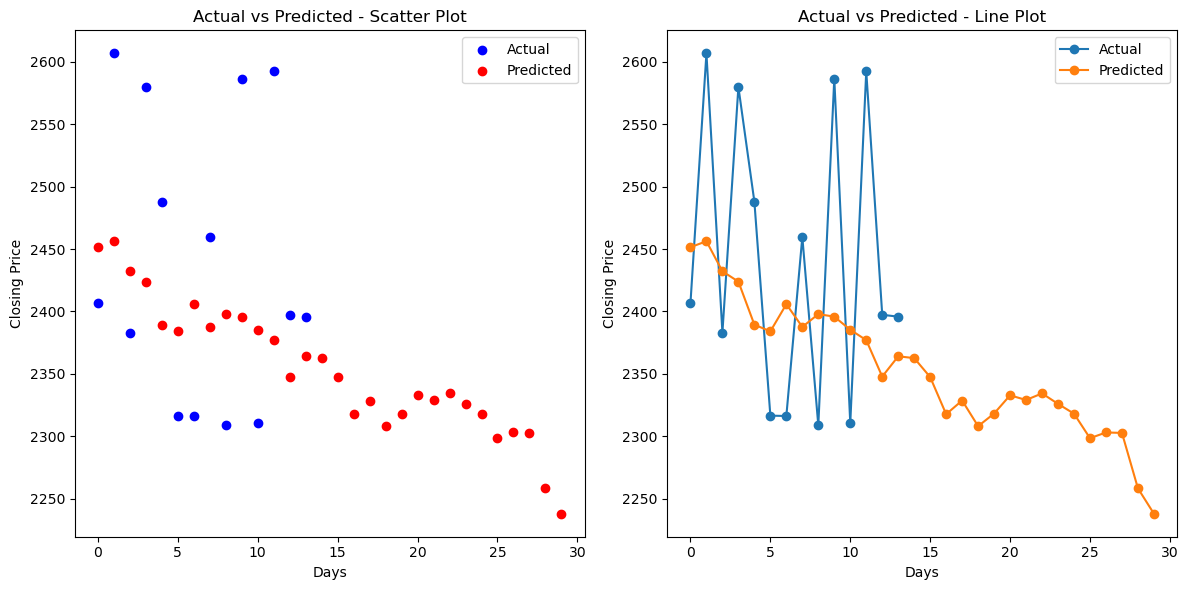

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['open' , 'high' ,'low' , 'prev.close', 'ltp','close' , 'vwap' ]
df = pd.DataFrame(data_matrix, columns=columns)
for col in columns:
    if df[col].dtype == 'O':  
        df[col] = df[col].str.replace(',', '').astype('double')
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X[:90, :], y[:90], test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X[-30:, :])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test[-30:])), y_test[-30:], label='Actual', color='blue')
plt.scatter(range(len(y_pred[-30:])), y_pred[-30:], label='Predicted', color='red')
plt.title('Actual vs Predicted - Scatter Plot')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(len(y_test[-30:])), y_test[-30:], label='Actual', marker='o')
plt.plot(range(len(y_pred[-30:])), y_pred[-30:], label='Predicted', marker='o')
plt.title('Actual vs Predicted - Line Plot')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()

plt.tight_layout()
plt.show()
